In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("BlackFriday.csv")

Get an overview over the age distribution, grouped by gender, city category and marital status

In [21]:
#data_sorted = data.sort_values(by='Age', inplace=False, ascending=True)
#data_sorted["Age"] = 
#g = sns.FacetGrid(data_sorted, row='City_Category', col='Marital_Status', aspect=2)
#g = g.map(plt.hist, 'Age', bins=len(data.Age.unique()), align='left')
#g = g.set(xticks=data_sorted.Age.unique())

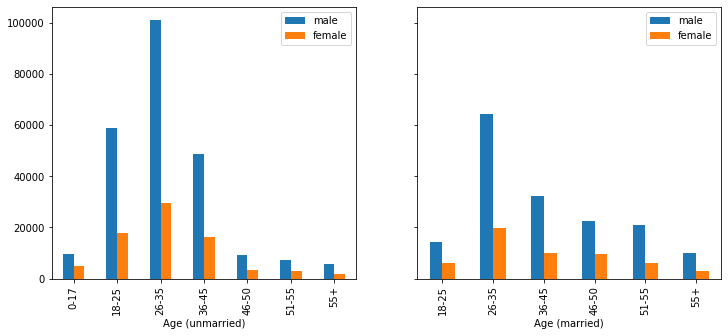

In [25]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
data_married = data[data.Marital_Status == 0]
df = pd.DataFrame({'male': pd.value_counts(data_married[data_married.Gender == 'M']['Age']).values,'female': pd.value_counts(data_married[data_married.Gender == 'F']['Age']).values}, index=pd.value_counts(data_married['Age']).index)
plot = df.sort_index().plot.bar(ax=ax)
ax.set_xlabel("Age (unmarried)")
data_married = data[data.Marital_Status == 1]
df = pd.DataFrame({'male': pd.value_counts(data_married[data_married.Gender == 'M']['Age']).values,'female': pd.value_counts(data_married[data_married.Gender == 'F']['Age']).values}, index=pd.value_counts(data_married['Age']).index)
plot = df.sort_index().plot.bar(ax=ax2)
plt.xlabel("Age (married)")
ylabel = plt.ylabel("Purchases")

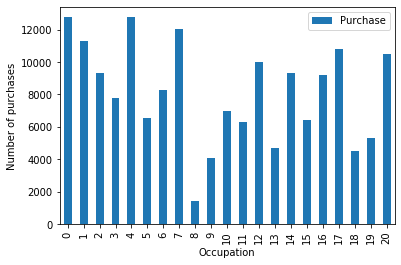

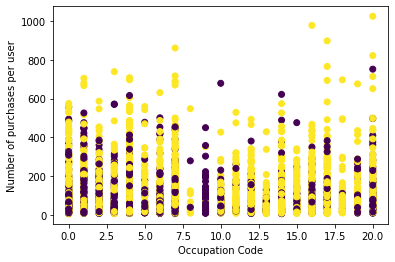

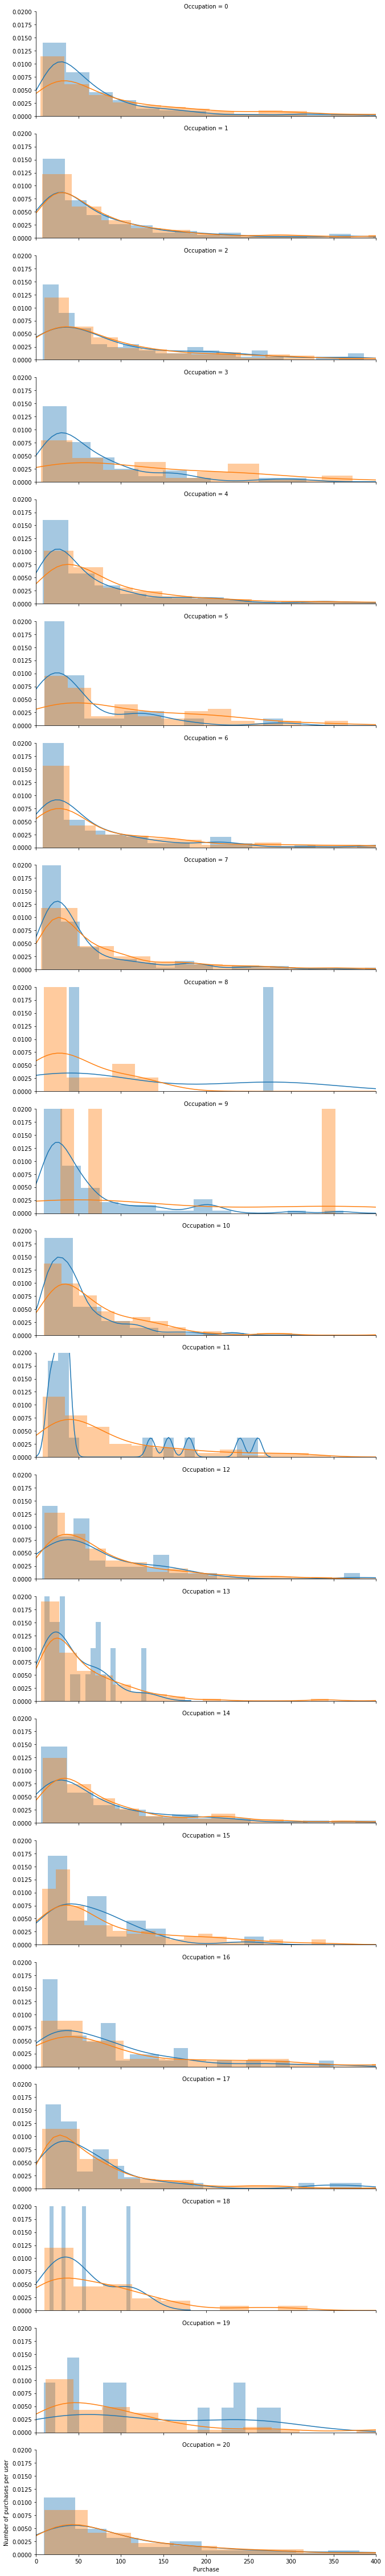

In [50]:
data.set_index(['User_ID', 'Gender', 'Age', 'Occupation'])
data_occupations = data.groupby('Occupation').nunique()
data_occupations.plot.bar(x='Occupation', y='Purchase')
plt.xticks(ticks=data_occupations.index.tolist(), labels=data_occupations.index.tolist())
ylabel = plt.ylabel("Number of purchases")
plt.show()
plt.close()

data_customers = data.groupby(['User_ID', 'Gender', 'Occupation']).count().reset_index()
#print(data_customers.head())
plt.scatter(data_customers.Occupation, data_customers.Purchase, c=data_customers.Gender=='M')
xl = plt.xlabel("Occupation Code")
yl = plt.ylabel("Number of purchases per user")
plt.show()
plt.close()

g = sns.FacetGrid(data_customers, row='Occupation', hue='Gender', aspect=3, sharey=True)
g = g.map(sns.distplot, 'Purchase', bins=20)
plt.xlim(0, 400)
plt.ylim(0, 0.02)
ylabel = plt.ylabel("Number of purchases per user")

For the products selling the most, show distribution of the most frequent features: gender, age, occupation, city_category, stay_in, marital_status

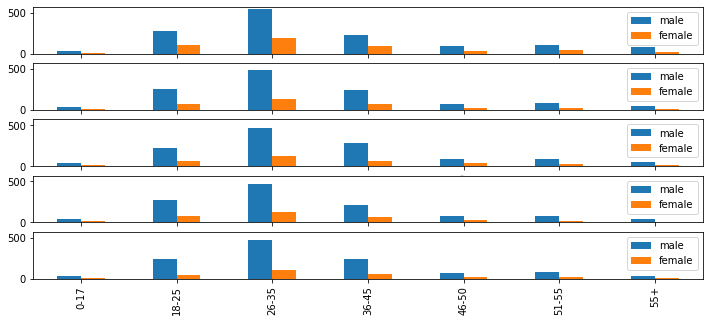

In [71]:
data_products = data.groupby(['Product_ID']).count().sort_values(by='Purchase', ascending=False)
fig, axes = plt.subplots(nrows=5, sharey=True, figsize=(12,5))

for i,product_id in enumerate(data_products.index.tolist()[:5]):
    data_product = data[data.Product_ID == product_id]
    #print(data_product)
    df = pd.DataFrame({'male': pd.value_counts(data_product[data_product.Gender == 'M']['Age']).values,'female': pd.value_counts(data_product[data_product.Gender == 'F']['Age']).values}, index=pd.value_counts(data_product['Age']).index)
    plot = df.sort_index().plot.bar(ax=axes[i])
    ax.set_xlabel("Age ("+product_id+")")

Do the same for cumulated sales across product categories

Train a predictor of purchase composition: rank product categories (or product IDs) according to buying likelihood, given the features above 